# <center> Fall 2021 Data Science Intern Challenge !</center>

#### Please complete the following questions, and provide your thought process/work. You can attach your work in a text file, link, etc. on the application page. Please ensure answers are easily visible for reviewers!


**Question 1: Given some sample data, write a program to answer the following: click here to access the required data set**

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
2.	What metric would you report for this dataset?
3.	What is its value?


Importing Pandas library to help read the data and do data manuplation, and data cleaning.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

Checking the first five rows of the data to take an overview of the data.

In [3]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


The question above is asking about Average Order Value (AOV). Let me define AOV here; AOV shows how much each customer spends on average for each order. 

Here is an equation that help to find AOV

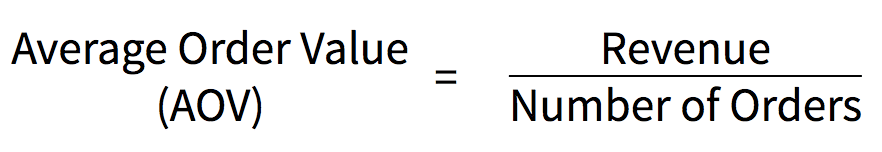

Revenue is the total amount of income generated by the sales.

1. We can find the revenue by using the sum function to sum all the values on the order amount column.

In [4]:
total_order_amount = df['order_amount'].sum()
print(f"{total_order_amount:,}")

15,725,640


2. Let us use the sum function again to find the total orders.

In [5]:
total_orders = df['order_id'].count()
print(f"{total_orders:,}")

5,000


Now, let us use the equation mentioned above to find AOV.

In [6]:
aov = total_order_amount/total_orders
print(f"{aov:,}")

3,145.128


This what the questioned mentioned above regards the wrong answer, but why is this wrong, is not this the same equation mentioen above for finding AOV?! 

Let me explain why is this not the right answer. 

The answer is **OUTLIERS**. Outliers are data points that are far from other data points.

An outlier can affect the mean of a data set by skewing the results so that the mean is no longer representative of the data set.

### 1. We can find outliers by sorting the data by the order amount column .

In [7]:
df.sort_values(by='order_amount', ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
...,...,...,...,...,...,...,...
3871,3872,92,818,90,1,debit,2017-03-18 9:10:08
2503,2504,92,935,90,1,credit_card,2017-03-28 2:30:26
4414,4415,92,927,90,1,credit_card,2017-03-17 9:57:01
3363,3364,92,730,90,1,credit_card,2017-03-11 23:20:31


As you can see from here. These orders are really huge comparing over data points.

### 2. We can use Boxplot to get the data outliers

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

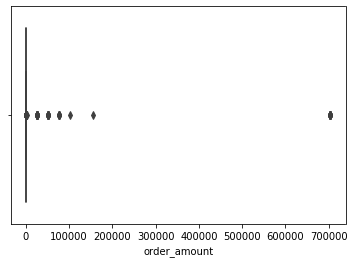

In [9]:
sns.boxplot(df['order_amount'])

The graph above shows the interquartile range for the order amount column. 

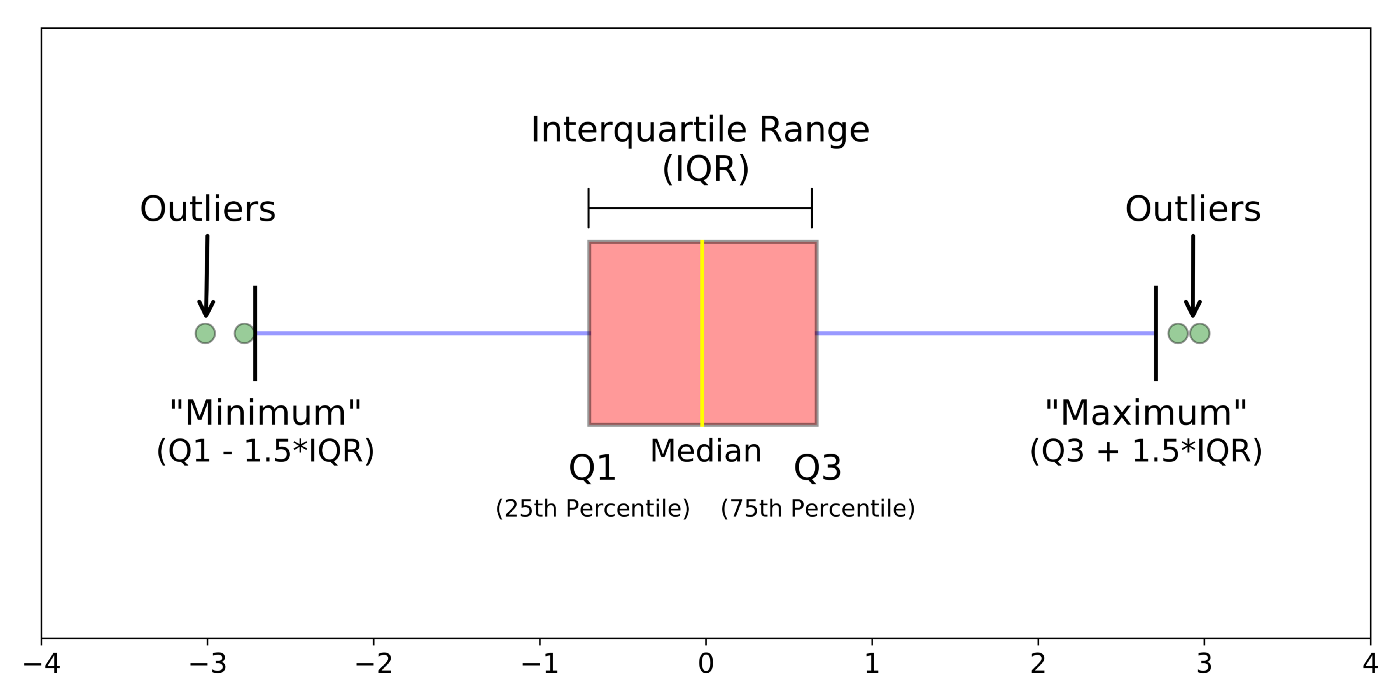

Interquartile range is the amount of spread in the middle 50%, percent of a dataset.
In other words, it is the distance between the first quartile (Q1) and the third quartile (Q3).  

#### <center> IQR = Q3 - Q1 </center>

Let us find the IQR for the order amount column.

In [10]:
q1=df['order_amount'].quantile(0.25)
q3=df['order_amount'].quantile(0.75)
iqr=q3-q1
low=q1-1.5*iqr 
upr=q3+1.5*iqr
low,upr

(-177.5, 730.5)

Now to answer the first part of the question (**1.Think about what could be going wrong with our calculation. Think about a better way to evaluate this data?**) I need to find a way to deal with the outliers

One way is to do delete the outliers.

I want to see how many outliers are there in the data using IQR

In [11]:
df[(df.order_amount < low) | (df.order_amount > upr)].count()

order_id          141
shop_id           141
user_id           141
order_amount      141
total_items       141
payment_method    141
created_at        141
dtype: int64

See the data shape before removing outliers

In [12]:
df.shape

(5000, 7)

In [13]:
#df.drop(df[(df.order_amount < low) | (df.order_amount > upr)].index, inplace=True)

In [14]:
df_cleaned = df.drop(df[(df.order_amount < low) | (df.order_amount > upr)].index)

See the data shape after removing outliers

In [15]:
df_cleaned.shape

(4859, 7)

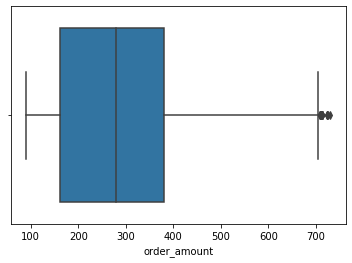

In [16]:
sns.boxplot(df_cleaned['order_amount'])

Now, let us find the value for AOV and answer the third part of the question(**3.What is its value?**)

In [17]:
total_order_amount = df_cleaned['order_amount'].sum()
print(f"{total_order_amount:,}")

1,427,163


In [18]:
total_orders = df_cleaned['order_id'].count()
print(f"{total_orders:,}")

4,859


In [19]:
aov = total_order_amount/total_orders
print(f"{aov:,}")

293.7153735336489


This answer looks better for shoes orders 

To answer the second part of the question (**2.What metric would you report for this dataset?**)

I would use the Average Purchase Value

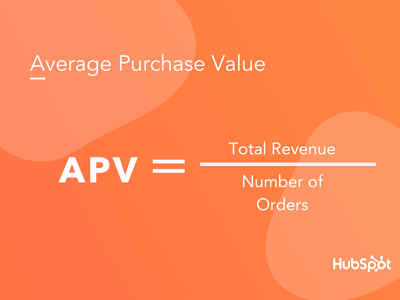

It is similar to the AOV, but here in the number of orders, we use the sum of total items column instead of the sum of order id.

In [30]:
total_order_amount2 = df_cleaned['order_amount'].sum()
print(f"{total_order_amount2:,}")

1,427,163


In [31]:
total_items = df_cleaned['total_items'].sum()
print(f"{total_items:,}")

9,476


In [32]:
apv = total_order_amount2/total_items
print(f"{apv:,}")

150.60816800337696


To summary 

In [36]:
data_metric  = [ ['Average Order Value',round(aov,2)],['Average Purchase Value', round(apv,2) ]]

summary  = pd.DataFrame(data_metric, columns=['Key Metric', 'result']) 
summary.sort_values(by='result', ascending= False)

,Key Metric,result
0,Average Order Value,293.72
1,Average Purchase Value,150.61


The end